<a href="https://colab.research.google.com/github/othoni-hub/ECG1/blob/main/TP_Lois_Discretes_usuelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG1** 

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>

## **Toutes les lois discrètes usuelles**




**O.Thöni**

professeur de Mathématiques, CPGE-ECG1, Lycée Saint-Charles Sainte-Croix - LE MANS

In [ ]:
from random import random
import matplotlib.pyplot as plt
from math import log, exp, pi, sqrt


### 1. Lois usuelles discrètes à valeurs entières

L'idée est de ne pas utiliser les fonctions toutes prêtes des modules *Numpy* ou *random*, par exemple...

**_1.1. Loi de Bernoulli_**


In [ ]:
def bernoulli(p) :
    return int(random() < p)

def echantillon_bernoulli(N,p):
    echt = []
    for k in range(N):
        b = bernoulli(p)
        echt = echt + [b]
    return echt

In [ ]:
p = 0.4 # probabilité de succès
N = 100 # taille des échantillons

# échantillon de B(p)
echantillon = [0]*N

print('Échantillon de',N, 'tirages selon la loi B(',p,')')
echantillon[:] = echantillon_bernoulli(N,p)
S = sum(echantillon)
print(echantillon)
print('Nombre de succès sur',N,'tirages de Bernoulli de probabilité',p,':',sum(echantillon))
print("Moyenne de l'échantillon :", S/N)
print('Espérance théorique :',p)

Échantillon de 100 tirages selon la loi B( 0.4 )
[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0]
Nombre de succès sur 100 tirages de Bernoulli de probabilité 0.4 : 31
Moyenne de l'échantillon : 0.31
Espérance théorique : 0.4


**_Diagramme en bâtons_**

**<span style="color: #26B260">Python : module *matplotlib.pyplot*, diagrammes en barres</span>**

In [ ]:
def tabuler(X_Omega, echantillon):
    card = len(X_Omega)
    frequences = [0]*card

    for k in echantillon :
        if k <= X_Omega[-1]:
            frequences[k-X_Omega[0]] = frequences[k-X_Omega[0]] + 1/N
    
    #print(frequences)
    return(frequences)


In [ ]:
def diagramme_batons(X_Omega,tabule,probabilites):
    # tracer les diagrammes en bâtons
    plt.grid(True)
    largeur = (X_Omega[-1] - X_Omega[0])/100

    plt.bar(X_Omega, probabilites, width = 3*largeur, color = 'blue', alpha = 0.3, label = 'Probabilites theoriques')
    plt.bar(X_Omega, tabule, width = largeur, color = 'red', alpha = 1, label = 'Simulation')

    plt.xlabel('X_Omega')
    plt.ylabel('Frequences')
    plt.legend()

    ax = plt.gca() # récupération du paramétrage des axes

    ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
    ax.spines['top'].set_color('none')

Text(0.5, 1.0, 'Simulation de 100 tirages selon une loi B(0.4)')

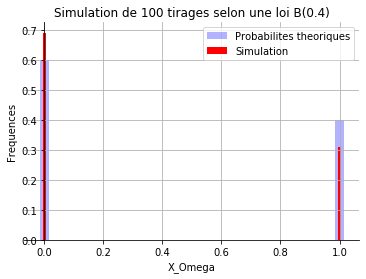

In [ ]:
# diagramme en bâtons loi de Bernoulli
X_Omega = [0,1]

# loi théorique
probabilites = [1-p,p]

# tabulation de la simulation
frequences = tabuler(X_Omega,echantillon)

diagramme_batons(X_Omega, frequences, probabilites)

plt.title('Simulation de '+ str(N)+' tirages selon une loi B('+ str(p)+')')


**_Représentation des fréquences cumulées et fonction de répartition_**

In [ ]:
def trace_fonction_repartition(X_omega, freqC, probaC):
    card = len(X_omega)
    
    plt.plot([X_omega[0]-1, X_Omega[0]],[0,0], color ='blue', linewidth = 8, alpha = 0.3, label = 'Fonction de repartition')
    plt.plot([X_Omega[0], X_Omega[0]],[0,probaC[0]], color ='blue', linewidth = 8, alpha = 0.3, label = '')
    plt.plot([X_omega[0]-1, X_Omega[0]],[0,0], color ='red', linewidth = 2, label = 'Frequences Cumulées')
    plt.plot([X_Omega[0], X_Omega[0]],[0,freqC[0]], color ='red', linewidth = 2, label = '')
    
    for k in range(card-1):
        plt.plot([X_omega[k], X_Omega[k+1]],[probaC[k],probaC[k]], color ='blue', linewidth = 8, alpha = 0.3, label = '')
        plt.plot([X_omega[k+1], X_Omega[k+1]],[probaC[k],probaC[k+1]], color ='blue', linewidth = 8, alpha = 0.3, label = '')
        plt.plot([X_omega[k], X_Omega[k+1]],[freqC[k],freqC[k]], color ='red', linewidth = 2, label = '')
        plt.plot([X_omega[k+1], X_Omega[k+1]],[freqC[k],freqC[k+1]], color ='red', linewidth = 2, label = '')
    
    plt.plot([X_omega[-1], X_Omega[-1]+1],[1,1], color ='blue', linewidth = 8, alpha = 0.3, label = '')
    plt.plot([X_omega[-1], X_Omega[-1]+1],[1,1], color ='red', linewidth = 2, label = '')
    
    
    plt.grid(True)
    plt.title('Frequences cumulees et Fonction de répartition')
    plt.xlabel('X_Omega')
    plt.ylabel('Frequences')
    plt.legend()
    
    plt.axis([X_omega[0] - 1,X_Omega[-1] + 1,0,1]) # dimensions, en unités graphiques, de la fenêtre graphique

    ax = plt.gca() # récupération du paramétrage des axes

    ax.spines['left'].set_position('zero') # positionnement de l'axe des ordonnées à x = 0
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero') # positionnement de l'axe des abscisses à y = 0
    ax.spines['top'].set_color('none')

def cumule(table):
    card = len(table)
    C = [0]* card
    C[0]=table[0]
    for k in range(1,card):
        C[k] = C[k-1]+table[k]
    return C

In [ ]:
def repartition() :
    freqCum = cumule(frequences)
    probaCum = cumule(probabilites)
    
    trace_fonction_repartition(X_Omega, freqCum, probaCum)

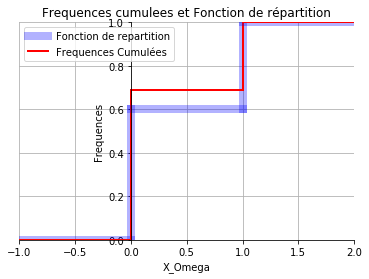

In [ ]:
repartition()

**_1.2. Loi binomiale_**

On reprend l'idée du nombre de succès dans une répétition indépendante de tirages de Bernouli

In [ ]:
def binomiale(n,p):
    B = []
    for k in range(n):
        B.append(bernoulli(p))
    return sum(B)

def echantillon_binomiale(N,n,p):
    echt = []
    for k in range(N):
        b = binomiale(n,p)
        echt = echt + [b]
    return echt

In [ ]:
n = 6 # nombre d'expériences de bernoulli
p = 0.4 # probabilité de succès
N = 100 # taille des échantillons

# échantillon de B(n,p)
echantillon = [0]*N

print('Échantillon de',N, 'tirages selon la loi B(',n,';',p,')')
echantillon[:] = echantillon_binomiale(N,n,p)
S = sum(echantillon)
print(echantillon)

print("Moyenne de l'échantillon :", S/N)
print('Espérance théorique :',n*p)


Échantillon de 100 tirages selon la loi B( 6 ; 0.4 )
[3, 3, 2, 2, 2, 3, 2, 1, 2, 1, 3, 3, 2, 5, 3, 2, 2, 2, 3, 2, 4, 2, 3, 2, 1, 3, 3, 4, 3, 4, 1, 1, 5, 2, 1, 2, 4, 3, 1, 3, 2, 4, 2, 2, 1, 2, 2, 3, 2, 4, 3, 1, 4, 3, 4, 2, 1, 3, 3, 3, 5, 4, 3, 4, 1, 2, 5, 2, 3, 3, 3, 1, 3, 3, 3, 6, 2, 3, 2, 3, 4, 4, 2, 2, 3, 4, 1, 1, 4, 2, 3, 1, 2, 2, 3, 4, 4, 3, 3, 1]
Moyenne de l'échantillon : 2.65
Espérance théorique : 2.4000000000000004


Text(0.5, 1.0, 'Simulation de 100 tirages selon une loi B(6 , 0.4)')

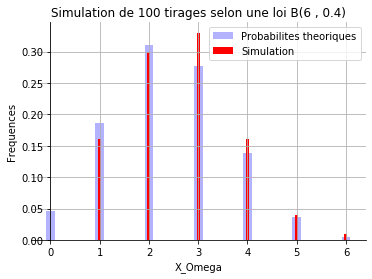

In [ ]:
# diagramme en bâtons loi Binomiale
X_Omega = [k for k in range(n+1)]

# loi théorique
def factorielle(n):
    f = 1
    for k in range(1,n+1):
        f = f * k
    return f
           
def combinaison(k,n):
    c = 1
    for m in range(n,n-k,-1):
        c = c * m
    c = int(c / factorielle(k))
    return c
           
           
probabilites = [combinaison(k,n)*p**k*(1-p)**(n-k) for k in range(n+1)]


# tabulation de la simulation
frequences = tabuler(X_Omega,echantillon)

diagramme_batons(X_Omega, frequences, probabilites)

plt.title('Simulation de '+ str(N)+' tirages selon une loi B('+str(n)+' , '+ str(p)+')')

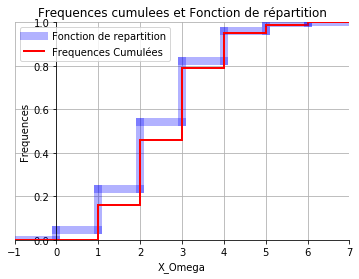

In [ ]:
repartition()

**_Remarque :_**

Très facilement adaptable pour simulation de tirages dans une urne bicolore. **<span style="color: #D17460">TCompl </span>** 

**_1.3. Loi uniforme discrète sur [[a ; b]]_**

Utiliser la commande *randint* du module *random* serait trop facile...


In [ ]:
def uniforme(a,b):
    return int(random()*(b-a+1))+a

def echantillon_uniforme(N,a,b):
    echt = []
    for k in range(N):
        u = uniforme(a,b)
        echt = echt + [u]
    return echt

In [ ]:
a = 2
b = 7
N = 100

# échantillon de U[[a;b]]
print('Échantillon de',N, 'tirages selon la loi U([[',a,';',b,']])')

echantillon = [0]*N

echantillon[:] = echantillon_uniforme(N,a,b)
S = sum(echantillon)

print(echantillon)
print("Moyenne de l'échantillon :",S/N)
print('Espérance théorique :',(a+b)/2)

Échantillon de 100 tirages selon la loi U([[ 2 ; 7 ]])
[4, 3, 4, 2, 3, 3, 3, 2, 7, 7, 5, 4, 5, 5, 6, 3, 4, 2, 2, 4, 6, 6, 4, 7, 6, 7, 4, 5, 6, 3, 3, 4, 6, 3, 5, 2, 2, 4, 7, 3, 3, 3, 3, 4, 2, 4, 7, 6, 7, 7, 4, 2, 2, 5, 2, 2, 3, 6, 7, 3, 3, 3, 6, 2, 7, 7, 4, 5, 7, 3, 3, 7, 6, 7, 5, 7, 7, 6, 6, 6, 5, 6, 5, 4, 4, 5, 3, 3, 4, 7, 2, 6, 5, 7, 3, 3, 3, 3, 3, 3]
Moyenne de l'échantillon : 4.44
Espérance théorique : 4.5


Text(0.5, 1.0, 'Simulation de 100 tirages selon une loi U([[2 , 7]])')

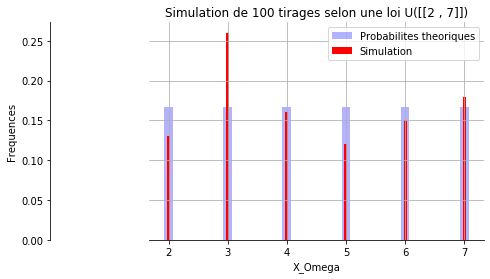

In [ ]:
# diagramme en bâtons loi uniforme discrète sur [[a;b]]
X_Omega = [k for k in range(a,b+1)]

# loi théorique
probabilites = [1/(b-a+1) for k in range(a,b+1)]

# tabulation de la simulation
frequences = tabuler(X_Omega,echantillon)

diagramme_batons(X_Omega, frequences, probabilites)

plt.title('Simulation de '+ str(N)+' tirages selon une loi U([['+str(a)+' , '+ str(b)+']])')

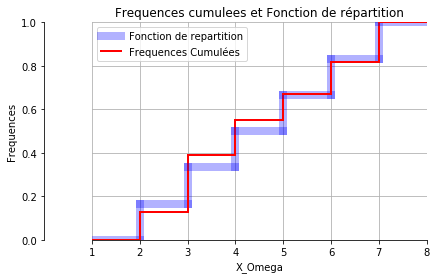

In [ ]:
repartition()

**_1.4. Loi géométrique_**

Répétition indépendante de tirages de Bernoulli jusqu'au premier succès...

In [ ]:
def geometrique(p):
    g = 1
    while bernoulli(p)==0:
        g = g + 1
    return g

def echantillon_geometrique(N,p):
    echt = []
    for k in range(N):
        g = geometrique(p)
        echt = echt + [g]
    return echt

In [ ]:
p = 0.4 # probabilité de succès
N = 100 # taille des échantillons

# échantillon
print('Échantillon de',N, 'tirages selon la loi G(',p,')')
echantillon = [0]*N

echantillon[:] = echantillon_geometrique(N,p)
S = sum(echantillon)

print(echantillon)
print("Moyenne de l'échantillon :",S/N)
print('Espérance théorique :',1/p)

Échantillon de 100 tirages selon la loi G( 0.4 )
[1, 5, 3, 6, 1, 1, 2, 5, 2, 1, 4, 2, 5, 1, 5, 7, 2, 4, 1, 14, 1, 1, 3, 3, 1, 2, 2, 4, 1, 2, 3, 2, 3, 6, 1, 1, 1, 2, 2, 4, 5, 1, 3, 3, 3, 1, 4, 3, 1, 4, 1, 3, 4, 1, 2, 2, 1, 2, 2, 2, 4, 1, 1, 1, 4, 2, 1, 5, 4, 3, 3, 1, 1, 3, 1, 2, 5, 3, 1, 2, 2, 2, 3, 1, 1, 5, 2, 1, 5, 1, 2, 7, 1, 1, 2, 2, 1, 3, 5, 1]
Moyenne de l'échantillon : 2.61
Espérance théorique : 2.5


Text(0.5, 1.0, 'Simulation de 100 tirages selon une loi G( 0.4 )')

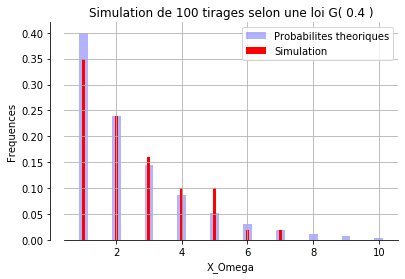

In [ ]:
# diagramme en bâtons loi géométrique de paramètre p
X_Omega = [k for k in range(1,int(4/p)+1)] # l'Univers d'une loi géométrique étant infini, on s'arrête à 4 fois l'espérance

# loi théorique
probabilites = [(1-p)**(k-1)*p for k in X_Omega]

# tabulation de la simulation
frequences = tabuler(X_Omega,echantillon)

diagramme_batons(X_Omega, frequences, probabilites)

plt.title('Simulation de '+ str(N)+' tirages selon une loi G( '+str(p)+' )')

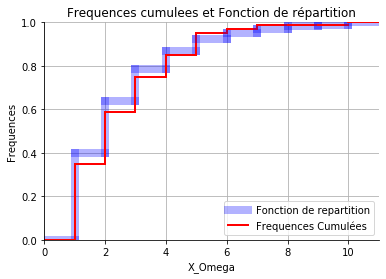

In [ ]:
repartition()